In [4]:
#Lets generate some linear looking datasets

import numpy as np

X = 2*np.random.rand(100,1)
y = 21 + 2*X + np.random.rand(100,1) #+ 4*X**2 + np.random.rand(100,1)

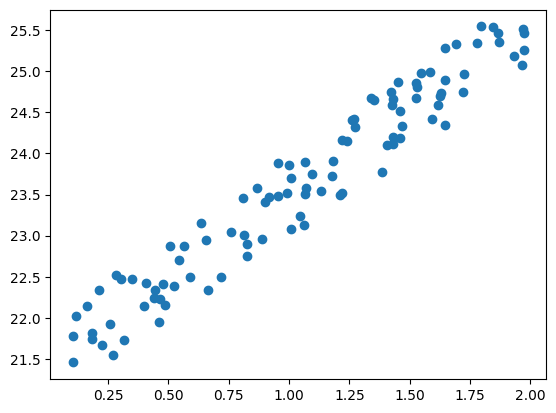

In [5]:
import matplotlib.pylab as plt
plt.scatter(X, y)

In [6]:
X_b =  np.c_[np.ones((100,1)), X]
X_b

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best #$thet0 = 2.5, theta1 = 2


#Now to make predictions using the model

X_new = np.array(([[0],[2]]))
X_new_b = np.c_[np.ones((2,1)), X_new] #add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)

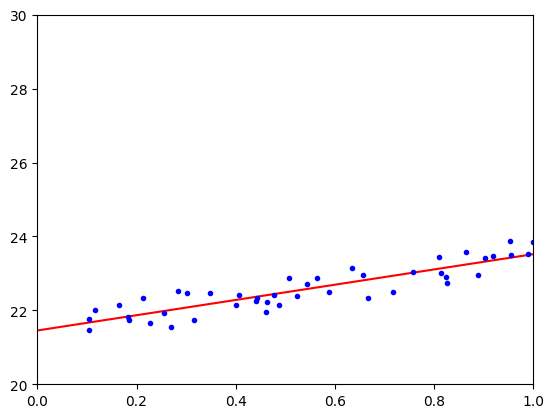

In [24]:
plt.plot(X_new, y_predict,'r-')
plt.plot(X, y, 'b.')
plt.axis([0,1,20,30])
plt.show()

In [27]:
#using sklearn 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_ , lin_reg.coef_

(array([21.45562453]), array([[2.06481252]]))

In [29]:
lin_reg.predict(X_new)

array([[21.45562453],
       [25.58524957]])

In [30]:
#The LinearRegression class is based on teh scipy.linalg.lstsq() which stands for least squares which one could call directly:

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [31]:
theta_best_svd

array([[21.45562453],
       [ 2.06481252]])

In [33]:
#The best svd is basically the moore penrose pseudoinverse which can be computed using the np.linalg.pinv()

np.linalg.pinv(X_b).dot(y)  #theta_best_svd

array([[21.45562453],
       [ 2.06481252]])

#### Gradient Descent

In [37]:
#Simple gradient descent

eta = 0.1
n_iterations = 1000
m = 100

#Gradient Descent Step = θ − η∇θ MSE(θ)
#theta is the initial step

theta = np.random.randn(2,1)   #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients



theta

array([[21.45562453],
       [ 2.06481252]])

In [82]:
#lets the plot the batch grad descent 
import matplotlib as mpl
def plot_grad_des(theta, eta):
    m = len(X_b)
    plt.plot(X, y,"b.")
    epochs = 1000
    n_shown = 150
    theta_path = []
    for epoch in range(epochs):
        if epoch <= n_shown:
            y_predict = X_new_b@theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch/n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle='solid', color=color)
            gradients = 2 / m * X_b.T@(X_b@theta - y)
            theta = theta - eta* gradients
            theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0,2,20,26])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))    

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

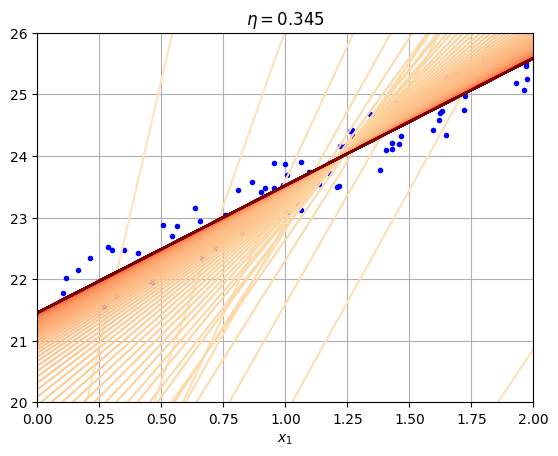

array([[ 0.49671415],
       [-0.1382643 ]])

In [84]:
plot_grad_des(theta,0.345)
plt.show()
theta

In [78]:
#Stocastic Gradient Descent using a simple learning schedule

from random import random


n_epochs = 50
t0, t1 =5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t + t1)


theta =np.random.randn(2,1) # random initialization


for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)  - yi)
        eta =learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


theta

array([[21.44400425],
       [ 2.07477058]])

#### Polynomial regression

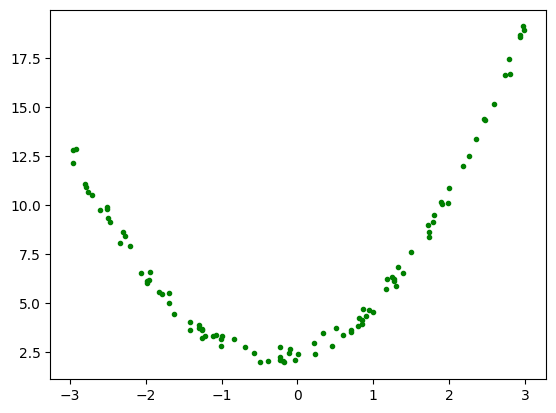

In [1]:
#First generating a polynomial function
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
m = 100
X = 6*np.random.rand(m,1) - 3
y = 1.5*X**2 + X + 2 + np.random.rand(m,1)
plt.plot(X,y,'g.')

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

(array([1.4943115]), array([1.4943115 , 2.23296686]))

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

In [8]:
lin_reg.coef_, lin_reg.intercept_

(array([[1.0295759 , 1.51902089]]), array([2.4175273]))

In [9]:
X_new = np.linspace(-3,3,100).reshape(m,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

(-3.0, 3.0, 2.0, 6.0)

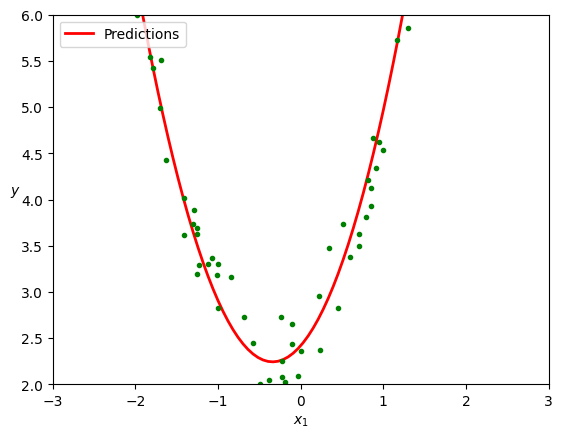

In [11]:
plt.plot(X_new,y_new,'r-', linewidth=2, label="Predictions")
plt.plot(X,y,'g.')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc = "upper left")
plt.axis([-3,3,2,6])

#### Learning Curves

In [54]:
X = 6*np.random.rand(100,1) - 3
X_poly = pf.fit_transform(X)
y = 1.5*X**2 + 2*X + np.random.rand(100,1)

In [55]:
lin_reg.fit(X_poly,y)

LinearRegression()

(-3.0, 2.0, -1.0, 10.0)

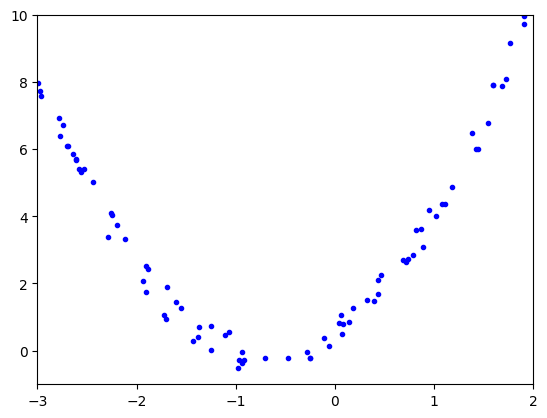

In [56]:
plt.plot(X,y,'b.')
plt.axis([-3,2,-1,10])

In [74]:
X_new = np.linspace(-3,3,100).reshape(100,1)
pf = PolynomialFeatures(degree=2)
X_new_poly = pf.fit_transform(X_new)

In [ ]:
y_new = lin_reg.predict(X_new_poly)

In [90]:
pf = PolynomialFeatures(degree=1)
X_poly = pf.fit_transform(X)
lin_reg.fit(X_poly, y)
X_new_poly1 = pf.transform(X_new)
y_new1= lin_reg.predict(X_new_poly1)

pf = PolynomialFeatures(degree=5)
X_poly = pf.fit_transform(X)
lin_reg.fit(X_poly, y)
X_new_poly300 = pf.transform(X_new)
y_new300= lin_reg.predict(X_new_poly300)

(-3.0, 3.0, -1.0, 10.0)

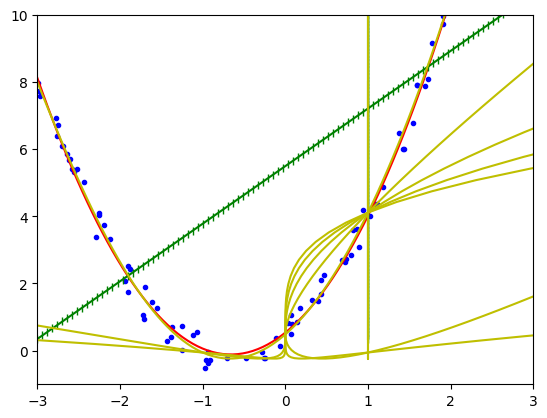

In [91]:
plt.plot(X,y,'b.')
plt.plot(X_new, y_new,'r-')
plt.plot(X_new_poly1,y_new1,'g-|')
plt.plot(X_new_poly300, y_new300, 'y-')
plt.axis([-3,3,-1,10])

#As seen in the yellow it largely tries to overfit the data

In [116]:
#A way to tell if the model is overfitting or underfitting the data is by using the learning curves


#Lets define a function first

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val')
    plt.legend()
    plt.ylabel('$RMSE$')
    plt.xlabel('no of rows')

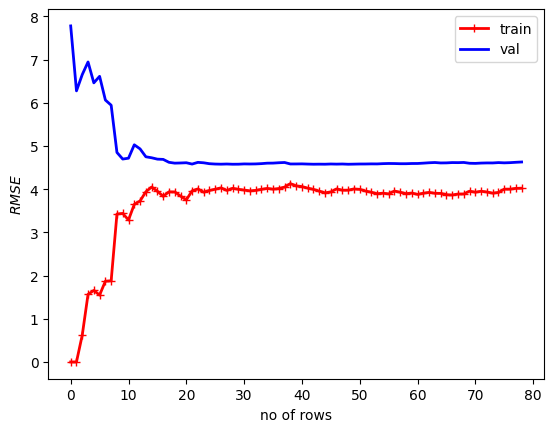

In [119]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)